# Import libraries and Load Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


## Data Description

- CRIM   :  per capita crime rate by town
- ZN     :  proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS  :  proportion of non-retail business acres per town
- CHAS   :  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX    :  nitric oxides concentration (parts per 10 million)
- RM     :  average number of rooms per dwelling
- AGE    :  proportion of owner-occupied units built prior to 1940
- DIS    :  weighted distances to five Boston employment centres
- RAD    :  index of accessibility to radial highways
- TAX    :  full-value property-tax rate per dollar 10,000
- PTRATIO :  pupil-teacher ratio by town
- B     :   1000(Bk - 0.63) ^ 2 where Bk is the proportion of blacks by town
- LSTAT  :  percent lower status of the population
- MEDV   :  Median value of owner-occupied homes in dollar 1000's

In [4]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv("housing.csv",header=None, delimiter=r"\s+" ,names=col_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Feature Selection

- Dividing dataset into Predictor and Criterion 

In [10]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)

features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


# EDA

- We will need to separate the dataset into features and the target variable
- The features will give us information about each data point
- The target variable - 'MEDV' is the variable we want to predict

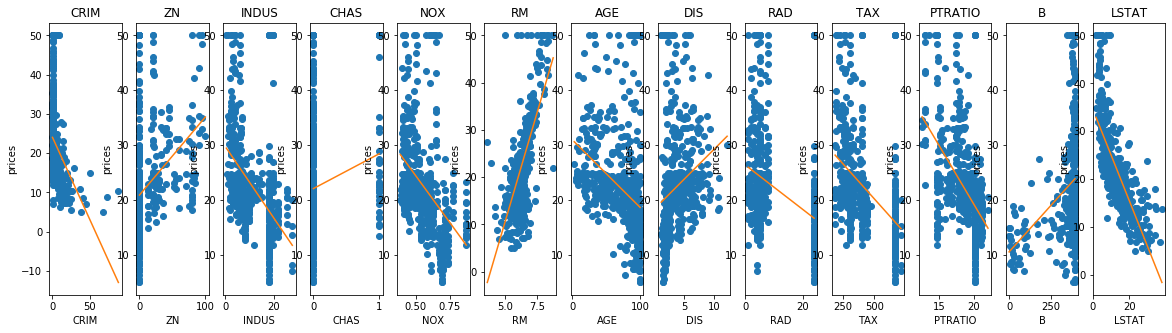

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 13, i+1)
    x = df[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

We can see that :

- per capita crime rate by town has Negative relation with the price
- proportion of residential land zoned has Positive relation with the price
- proportion of non-retail business acres per town has Negative relation with the price
- Charles River dummy variable  doesn't have much relation with price
- nitric oxides concentration has strong Negative relation with the price
- the average number of rooms among homes in the neighborhood has strong positive relation with price
- age of the units has clear negative relation with price
- distances to five Boston employment centres has clear Positive relation with the price
- index of accessibility to radial highways doesn't have clear realtion with price
- full-value property-tax rate per 10000 dollar has negative realtion with the price
- the ratio of students to teachers in primary and secondary schools in the neighborhood has Negative relation with price
- the percentage of homeowners in the neighborhood considered "lower class" (working poor) has strong Negative realtion with Price